In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [4]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']

In [5]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278


In [6]:
X=df[['gender','race_ethnicity','parental_level_of_education','lunch','test_preparation_course']]
y=df[['total_score']]
y['total_score'].dtype

dtype('int64')

In [7]:
#Create a Column Transformer with 3 Types of Transformers
num_features=X.select_dtypes(include="int64").columns
cat_features=X.select_dtypes(exclude='int64').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
one_hot_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",one_hot_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

X=preprocessor.fit_transform(X)

In [10]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 17), (200, 17))

In [11]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 36.5870
- Mean Absolute Error: 29.8084
- R2 Score: 0.2543
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 40.2047
- Mean Absolute Error: 31.4705
- R2 Score: 0.1622


Lasso
Model performance for Training set
- Root Mean Squared Error: 37.3079
- Mean Absolute Error: 30.1134
- R2 Score: 0.2246
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 41.1526
- Mean Absolute Error: 32.2553
- R2 Score: 0.1222


Ridge
Model performance for Training set
- Root Mean Squared Error: 36.5871
- Mean Absolute Error: 29.8066
- R2 Score: 0.2543
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 40.2101
- Mean Absolute Error: 31.4788
- R2 Score: 0.1619


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 35.1715
- Mean Absolute Error: 28.6343
- R2 Score: 0.3109
---------

c:\Users\krish\ML_E2E\e2eenv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 32.7973
- Mean Absolute Error: 26.3790
- R2 Score: 0.4008
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 44.8050
- Mean Absolute Error: 34.7533
- R2 Score: -0.0405


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 32.5944
- Mean Absolute Error: 25.8736
- R2 Score: 0.4082
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 45.4452
- Mean Absolute Error: 35.3522
- R2 Score: -0.0705


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 32.6310
- Mean Absolute Error: 26.0619
- R2 Score: 0.4068
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 44.8880
- Mean Absolute Error: 34.8929
- R2 Score: -0.0444


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 36.9367
- Mean Absolute Error: 30.1278

c:\Users\krish\ML_E2E\e2eenv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.162172
2,Ridge,0.161946
1,Lasso,0.122201
8,AdaBoost Regressor,0.115855
3,K-Neighbors Regressor,-0.013791
5,Random Forest Regressor,-0.040526
7,CatBoosting Regressor,-0.044386
6,XGBRegressor,-0.070473
4,Decision Tree,-0.073114


In [14]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 16.22


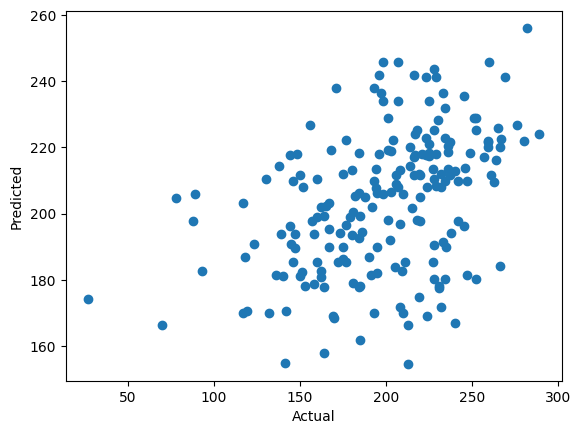

In [15]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

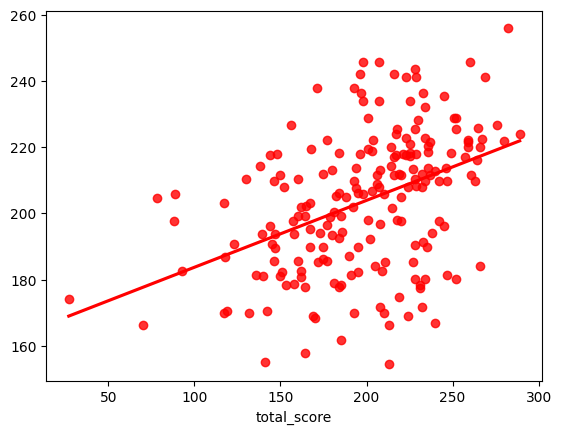

In [16]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');